In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
from typing import DefaultDict

In [6]:
DATASETS = {
    "Chest14": {"csv":"datasets/chest-14.csv"},
    "CheXpert": {"csv":"datasets/chexpert.csv"},
    "Chest X-ray Pneumonia": {"csv":"datasets/chest-xray-pneumonia.csv"},
    "RSNA": {"csv":"datasets/rsna.csv"},
    "GB7-FLG": {"csv":"datasets/gb7-flg.csv"},
    "TBX11K":{"csv": "datasets/tbx11k.csv"}
}

In [50]:
for dataset_name in DATASETS.keys():
    df = pd.read_csv(DATASETS[dataset_name]["csv"]) 
    DATASETS[dataset_name]["df"] = df
    DATASETS[dataset_name]["train"] = {}
    train_df = df[df["Phase"] == "train"]
    DATASETS[dataset_name]["train"][0] = train_df[train_df["Target"] == 0].shape[0]
    DATASETS[dataset_name]["train"][1] = train_df[train_df["Target"] == 1].shape[0]
    
    DATASETS[dataset_name]["val"] = {}
    val_df = df[df["Phase"] == "val"]
    DATASETS[dataset_name]["val"][0] = val_df[val_df["Target"] == 0].shape[0]
    DATASETS[dataset_name]["val"][1] = val_df[val_df["Target"] == 1].shape[0]
    
    DATASETS[dataset_name]["test"] = {}
    test_df = df[df["Phase"] == "test"]
    DATASETS[dataset_name]["test"][0] = test_df[test_df["Target"] == 0].shape[0]
    DATASETS[dataset_name]["test"][1] = test_df[test_df["Target"] == 1].shape[0]

# Full picture

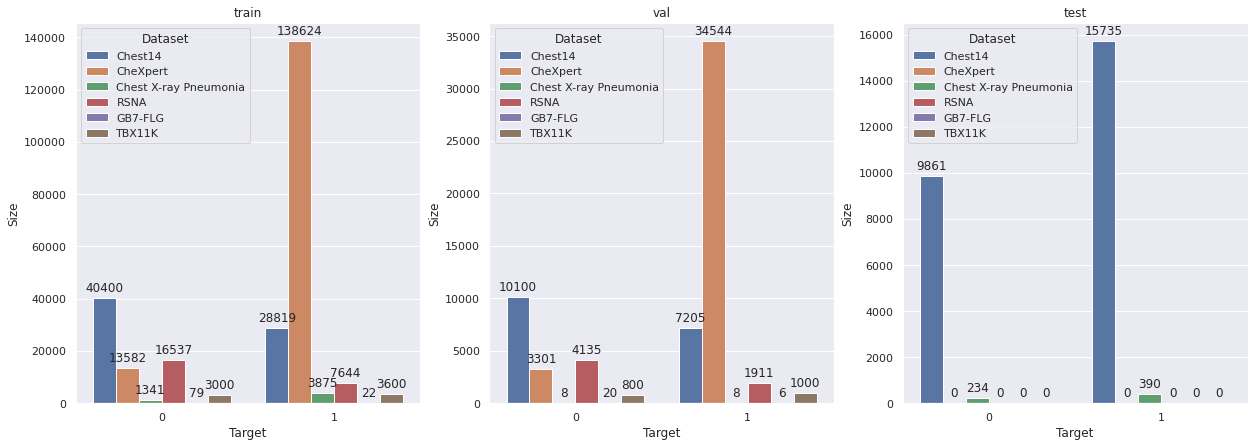

In [115]:
plt.figure(figsize=(21, 7))
phases = ["train", "val", "test"]
for phase_idx in range(len(phases)):
    phase = phases[phase_idx]
    data = []
    for dataset_name in DATASETS.keys():
        for target in [0,1]:
            item = {}
            item["Dataset"] = dataset_name
            item["Target"] = target
            item["Size"] = DATASETS[dataset_name][phase][target]
            
            data.append(item)
    data = pd.DataFrame(data)
    
    
    plt.subplot(1,3,phase_idx+1)
    sns.set_theme(style="darkgrid", palette="deep")
    splot = sns.barplot(x="Target", y="Size", hue="Dataset", data=data, )
    for p in splot.patches:
        splot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', 
                   va = 'center', 
                   xytext = (0, 10), 
                   textcoords = 'offset points')
    plt.title(phase)
plt.show()

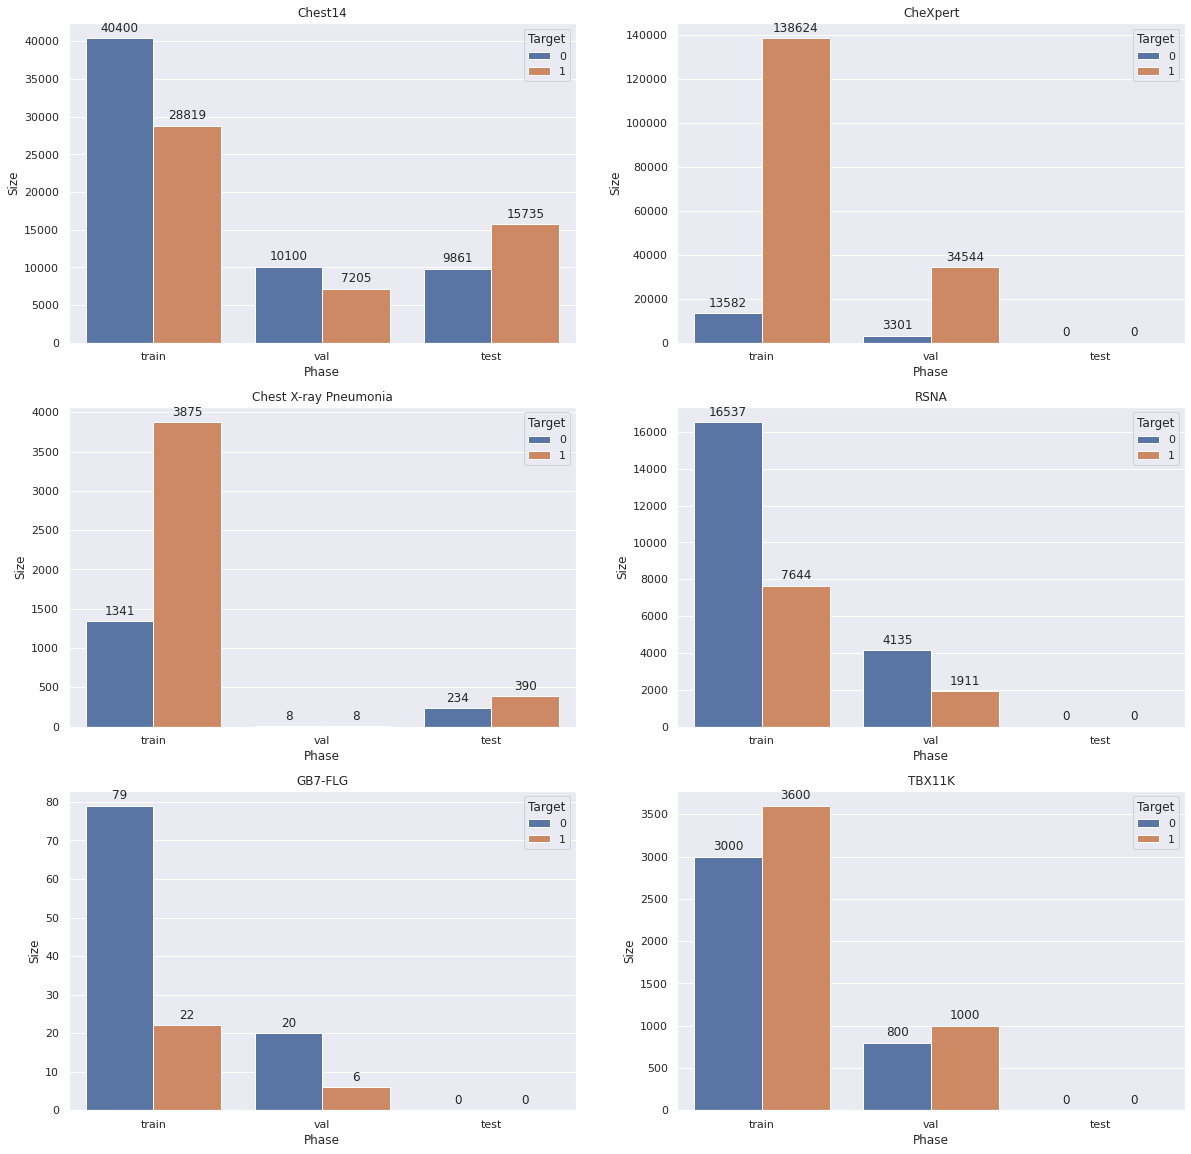

In [109]:
plt.figure(figsize=(20, 20))
datasets = list(DATASETS.keys())
for dataset_idx in range(len(datasets)):
    dataset = datasets[dataset_idx]
    data = []
    for phase in ["train", "val", "test"]:
        for target in [0,1]:
            item = {}
            item["Phase"] = phase
            item["Target"] = target
            item["Size"] = DATASETS[dataset][phase][target]
            
            data.append(item)
    data = pd.DataFrame(data)
    
    
    plt.subplot(3,2,dataset_idx+1)
    sns.set_theme(style="darkgrid", palette="deep")
    splot = sns.barplot(x="Phase", y="Size", hue="Target", data=data)
    for p in splot.patches:
        splot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', 
                   va = 'center', 
                   xytext = (0, 10), 
                   textcoords = 'offset points')
    plt.title(dataset)
plt.show()